In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Plot to show datasets

In [3]:
# Sample data
np.random.seed(0)
data = np.random.randint(0, 2, size=(300, 5))  # Binary data: 0 or 1
df = pd.DataFrame(data, columns=['Proteomics', 'Phosphoproteomics', 'WGS', 'RNA-seq', 'Additional'])
response = np.random.choice(['Sensitive', 'Refractory'], size=300)
df['Response'] = response

# Transpose the dataframe for plotting
df_transposed = df.drop('Response', axis=1).T

df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Proteomics,0,1,1,0,0,1,1,1,0,1,...,1,1,1,0,1,1,1,0,0,0
Phosphoproteomics,1,1,0,0,1,1,0,0,1,1,...,1,0,0,0,0,0,1,1,0,0
WGS,1,1,0,0,1,1,1,1,0,1,...,1,1,1,0,0,0,1,0,1,1
RNA-seq,0,1,1,0,0,1,0,1,1,0,...,1,0,1,1,1,1,1,0,0,0
Additional,1,1,0,1,0,0,1,0,1,1,...,0,0,0,0,0,1,1,1,1,0


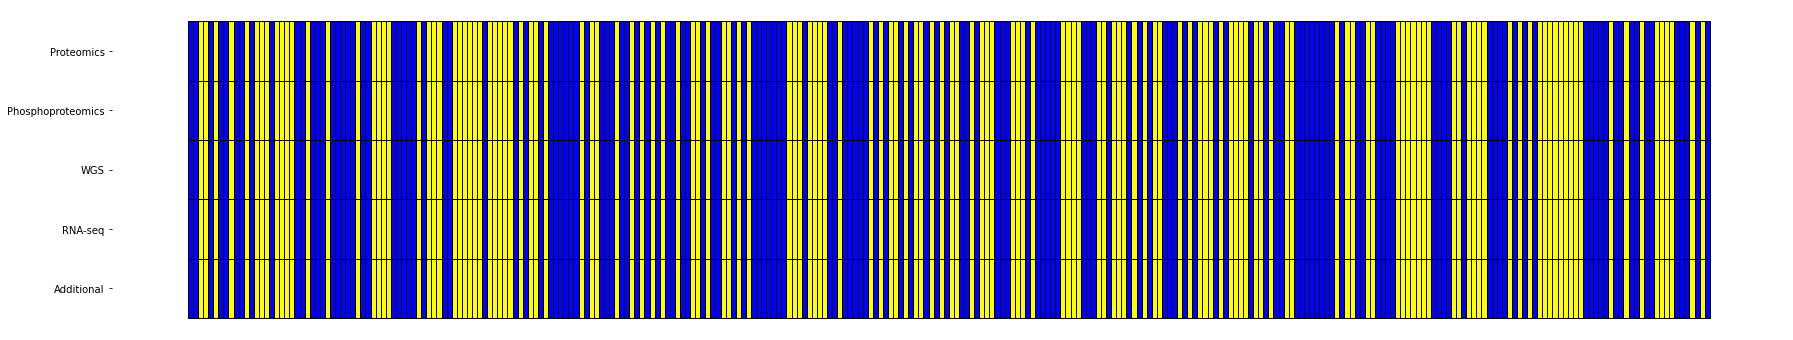

In [4]:
plt.figure(figsize=(30, 6))

# Loop through categories and patients to color the squares
colors = {'Sensitive': 'yellow', 'Refractory': 'blue'}

for i, category in enumerate(df_transposed.index):
    for j in range(len(df_transposed.columns)):
        color = colors[df.loc[j, 'Response']]
        plt.fill_between([j, j+1], i, i+1, color=color, edgecolor='black')

# Set the category labels on the y-axis
plt.yticks(np.arange(0.5, len(df.columns) - 1), df.columns[:-1])  # Exclude the 'Response' column

# Customize the axes
plt.gca().set_aspect('auto')  # Set the aspect of the plot to 'auto'
plt.gca().invert_yaxis()  # Invert the y-axis

# Remove the x-ticks, x-tick labels, and the x-axis
plt.tick_params(axis='x',          # Changes apply to the x-axis
                which='both',      # Both major and minor ticks are affected
                bottom=False,      # Ticks along the bottom edge are off
                top=False,         # Ticks along the top edge are off
                labelbottom=False) # Labels along the bottom edge are off

# Hide the spine for the top and right axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)  # Hide bottom spine
plt.gca().spines['left'].set_visible(False)    # Hide left spine

# Display the plot
plt.show()

In [8]:
df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/data/tasks/HGSOC_TCGA_merged_all.csv") #need df with hosp name also and all other metadata

cols = df.columns.to_list()[-20:]
cols

['ZNF800',
 'ZNF830',
 'ZNFX1',
 'ZNHIT2',
 'ZNHIT6',
 'ZNRF2',
 'ZPR1',
 'ZRANB2',
 'ZSCAN18',
 'ZSCAN31',
 'ZSWIM8',
 'ZW10',
 'ZWILCH',
 'ZWINT',
 'ZYG11B',
 'ZYX',
 'ZZEF1',
 'slide_id',
 'case_id',
 'label']